# Notebook for comparing and visualising common categories between Flowcam and IFCB datasets

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import sys
from os import listdir, path
from pathlib import Path
from typing import List, Tuple
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm

In [2]:
fc_data=pd.DataFrame(columns=["cat","samples"])
for j, i in enumerate(os.listdir("./flowcam_processed_1/")):
    if i == ".ipynb_checkpoints":
        pass
    else:
        a=np.load(os.path.join("./flowcam_processed_1",i) + f'/{i}_im.npy', allow_pickle=True).shape
#         print(j,"----",i," shape ",a[0])
        fc_data=pd.concat([fc_data,pd.DataFrame([[i,a[0]]],columns=["cat","samples"])],axis=0)
        

### do not run the below cell as it will flush the output of analysis done on full dataset, however, a similar code in the next cell executes the analysis on the sample dataset. 

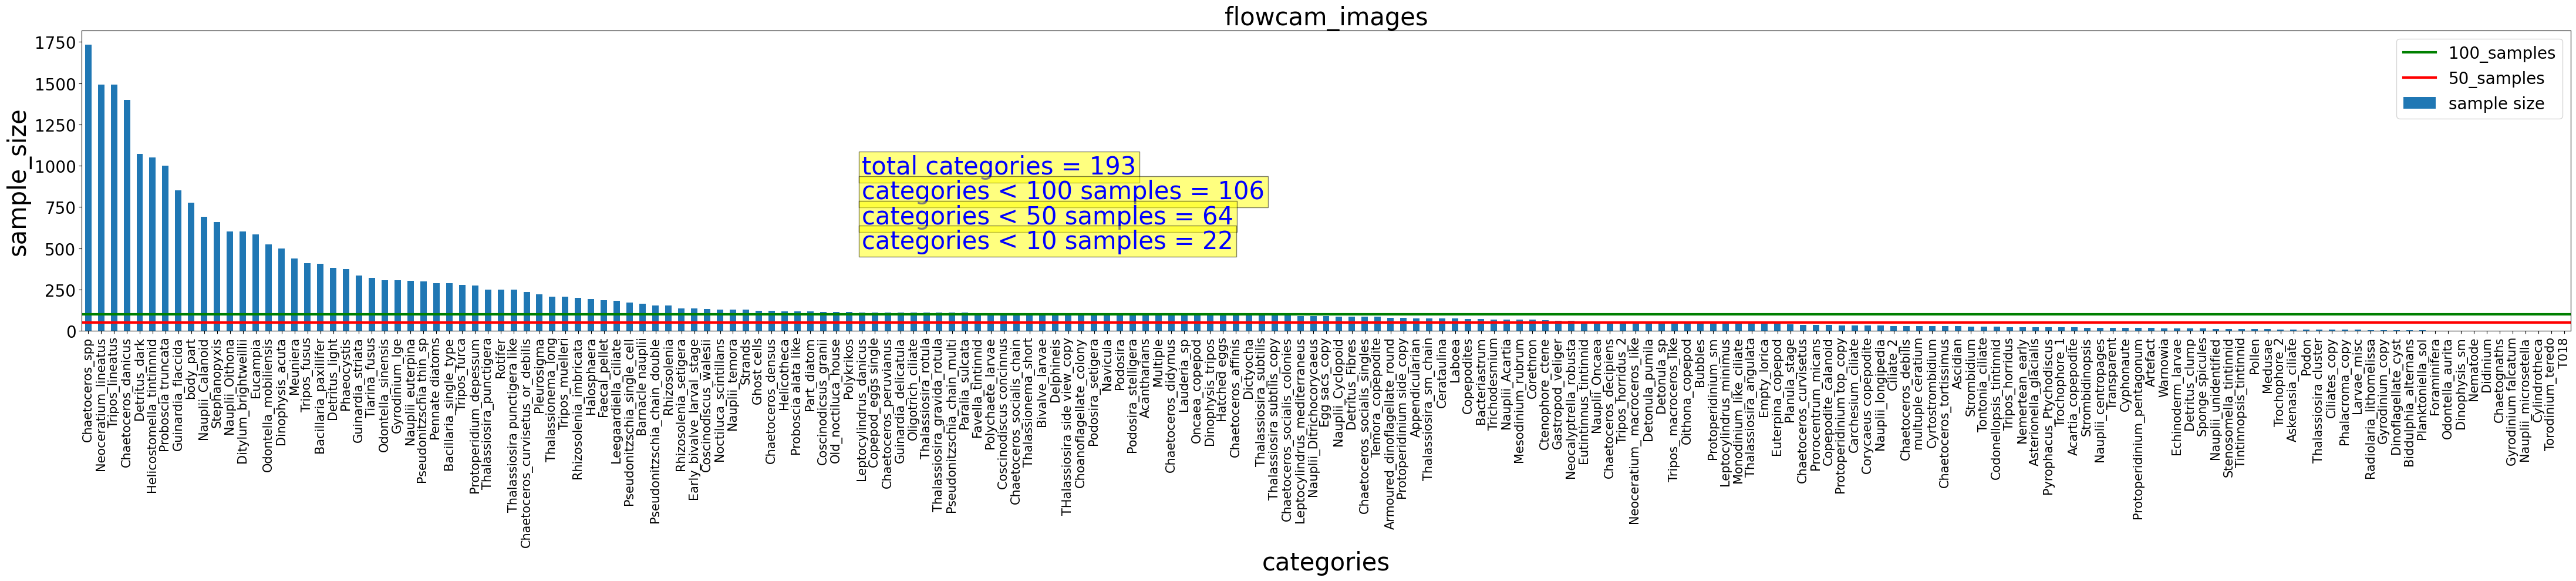

In [621]:
# fig,ax=plt.subplots(figsize=(44,10))
# fc_data.sort_values(by='samples',ascending=False).plot(kind='bar',x='cat',y='samples',label='sample size',ax=ax)
# _=ax.axhline(100,color='g',label='100_samples', lw=3)
# _=ax.axhline(50,color='r',label='50_samples',lw=3)
# _=ax.set_ylabel('sample_size',fontsize=30)
# _=ax.set_xlabel('categories',fontsize=30)
# # _=ax.text()
# _=ax.legend(fontsize=20)
# _=ax.set_title('flowcam_images',fontsize=30)
# _=plt.xticks(fontsize=15)
# _=plt.yticks(fontsize=20)
# _=plt.text(60, 950, f'total categories = {len(fc_data)}', fontsize=30, color='blue',
# #          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(60, 800, f'categories < 100 samples = {len(fc_data[fc_data.samples<100])}', fontsize=30, color='blue',
# #          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(60, 650, f'categories < 50 samples = {len(fc_data[fc_data.samples<50])}', fontsize=30, color='blue',
#          #verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(60, 500, f'categories < 10 samples = {len(fc_data[fc_data.samples<10])}', fontsize=30, color='blue',
#          #verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# plt.tight_layout()
# # plt.savefig('./fc_image.jpg')

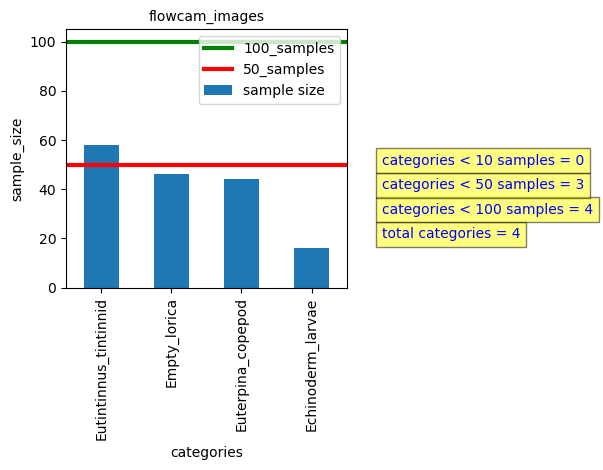

In [5]:
fig,ax=plt.subplots()
fc_data.sort_values(by='samples',ascending=False).plot(kind='bar',x='cat',y='samples',label='sample size',ax=ax)
_=ax.axhline(100,color='g',label='100_samples', lw=3)
_=ax.axhline(50,color='r',label='50_samples',lw=3)
_=ax.set_ylabel('sample_size',fontsize=10)
_=ax.set_xlabel('categories',fontsize=10)
# _=ax.text()
_=ax.legend(fontsize=10)
_=ax.set_title('flowcam_images',fontsize=10)
_=plt.xticks(fontsize=10)
_=plt.yticks(fontsize=10)
_=plt.text(4, 20, f'total categories = {len(fc_data)}', fontsize=10, color='blue',
#          verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
_=plt.text(4, 30, f'categories < 100 samples = {len(fc_data[fc_data.samples<100])}', fontsize=10, color='blue',
#          verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
_=plt.text(4, 40, f'categories < 50 samples = {len(fc_data[fc_data.samples<50])}', fontsize=10, color='blue',
         #verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
_=plt.text(4, 50, f'categories < 10 samples = {len(fc_data[fc_data.samples<10])}', fontsize=10, color='blue',
         #verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.tight_layout()
# plt.savefig('./fc_image.jpg')

In [6]:
pwd

'/lustre_scratch/prabgithub/test_folder/project_code1'

In [7]:
os.chdir('./raw_ifcb_data/')

In [8]:
ifcb_data=pd.DataFrame(columns=["cat","samples"])
for i in os.listdir("./"):
    if os.path.isdir(f'./{i}'):
        a=len(os.listdir(f'./{i}'))
        ifcb_data=pd.concat([ifcb_data,pd.DataFrame([[i,a]],columns=["cat","samples"])],axis=0)

### all the codes below are commented and running them will flush the output of analysis done on full dataset. The sample dataset may not have common categories to run the below analysis.

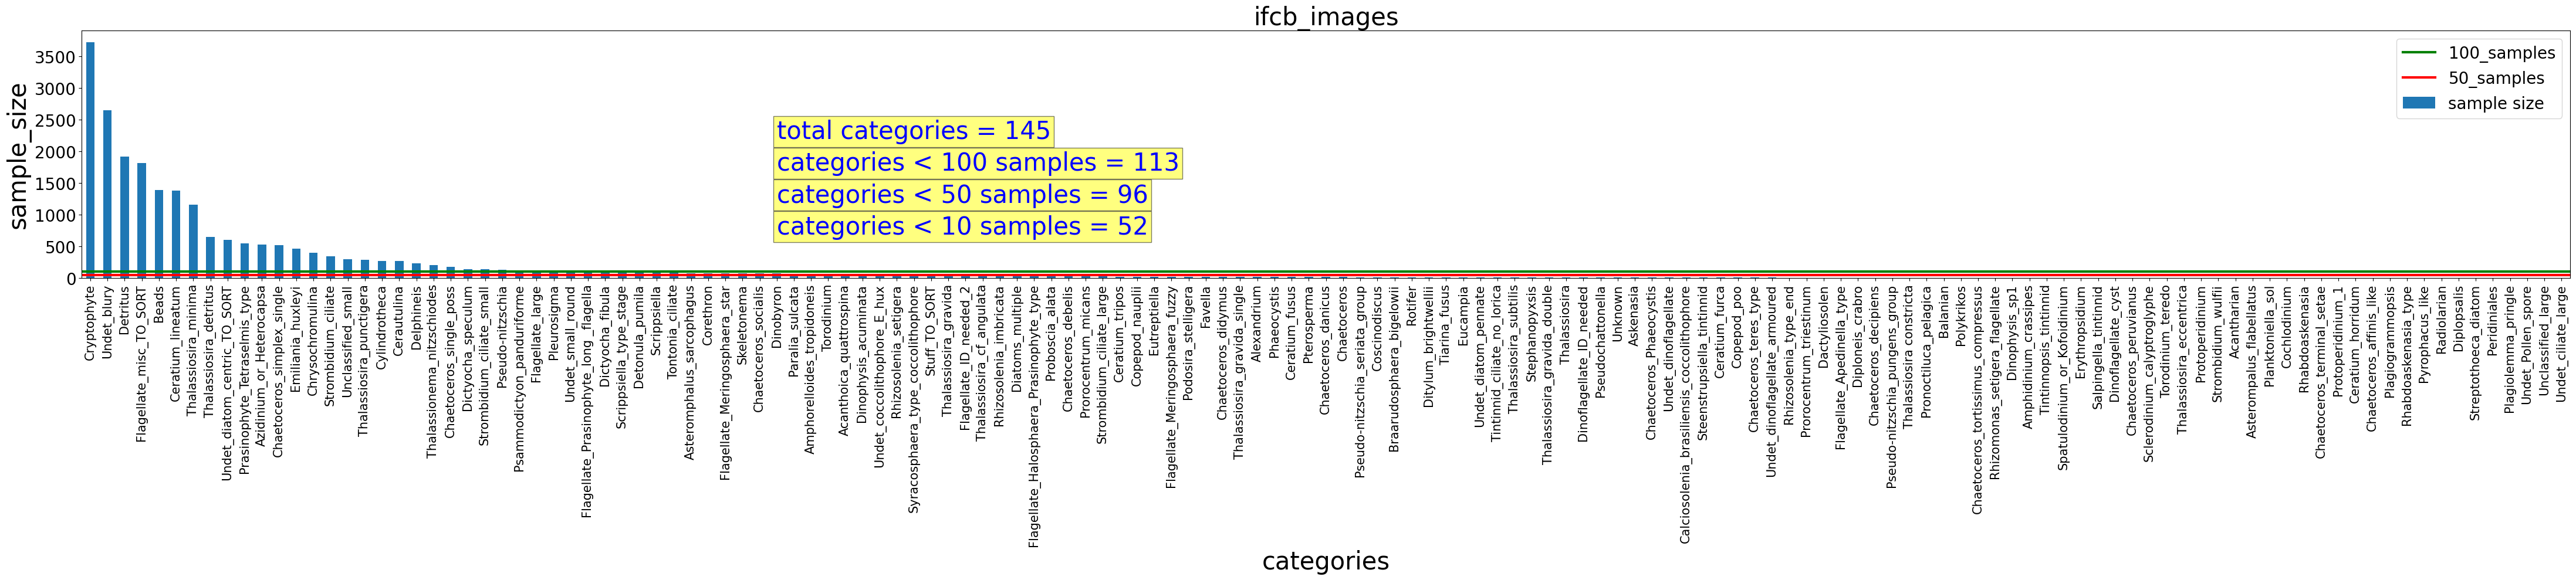

In [642]:
# fig,ax=plt.subplots(figsize=(44,10))
# ifcb_data.sort_values(by='samples',ascending=False).plot(kind='bar',x='cat',y='samples',label='sample size',ax=ax)
# _=ax.axhline(100,color='g',label='100_samples', lw=3)
# _=ax.axhline(50,color='r',label='50_samples',lw=3)
# _=ax.set_ylabel('sample_size',fontsize=30)
# _=ax.set_xlabel('categories',fontsize=30)
# _=ax.legend(fontsize=20)
# _=ax.set_title('ifcb_images',fontsize=30)
# _=plt.xticks(fontsize=15)
# _=plt.yticks(fontsize=20)
# _=plt.text(40, 2200, f'total categories = {len(ifcb_data)}', fontsize=30, color='blue',
# #          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(40, 1700, f'categories < 100 samples = {len(ifcb_data[ifcb_data.samples<100])}', fontsize=30, color='blue',
# #          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(40, 1200, f'categories < 50 samples = {len(ifcb_data[ifcb_data.samples<50])}', fontsize=30, color='blue',
#          #verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# _=plt.text(40, 700, f'categories < 10 samples = {len(ifcb_data[ifcb_data.samples<10])}', fontsize=30, color='blue',
#          #verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(facecolor='yellow', alpha=0.5))
# plt.tight_layout()
# plt.savefig('./ifcb_image.jpg')

In [656]:
# len(set(fc_data.cat).intersection(set(ifcb_data.cat)))

26

In [657]:
# len(set(ifcb_data.cat).union(set(fc_data.cat)))

312

In [658]:
# common=set(ifcb_data.cat).intersection(set(fc_data.cat))

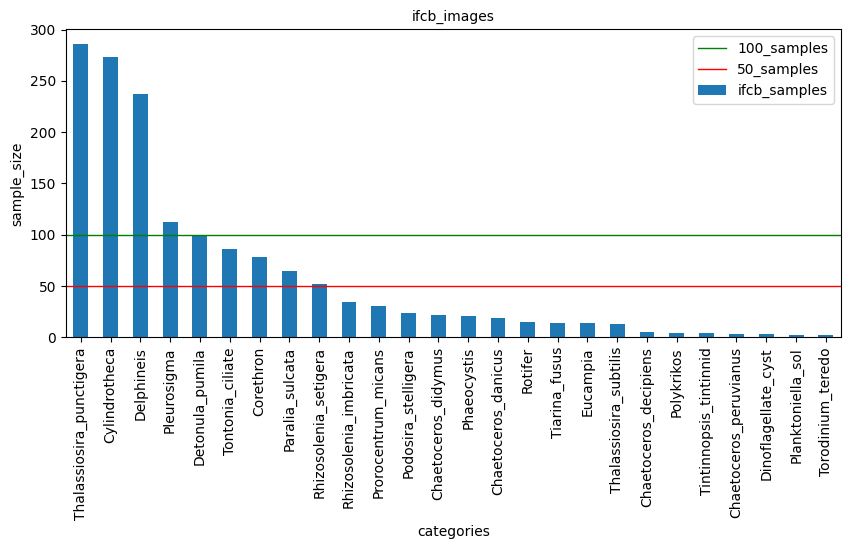

In [680]:
# fig,ax=plt.subplots(figsize=(10,4))
# a=ifcb_data[ifcb_data.cat.isin(list(common))].sort_values(by='samples',ascending=False)
# a.plot(kind='bar',x='cat',y='samples',label='ifcb_samples',ax=ax)
# _=ax.axhline(100,color='g',label='100_samples', lw=1)
# _=ax.axhline(50,color='r',label='50_samples',lw=1)
# _=ax.set_ylabel('sample_size',fontsize=10)
# _=ax.set_xlabel('categories',fontsize=10)
# _=ax.legend(fontsize=10)
# _=ax.set_title('ifcb_images',fontsize=10)


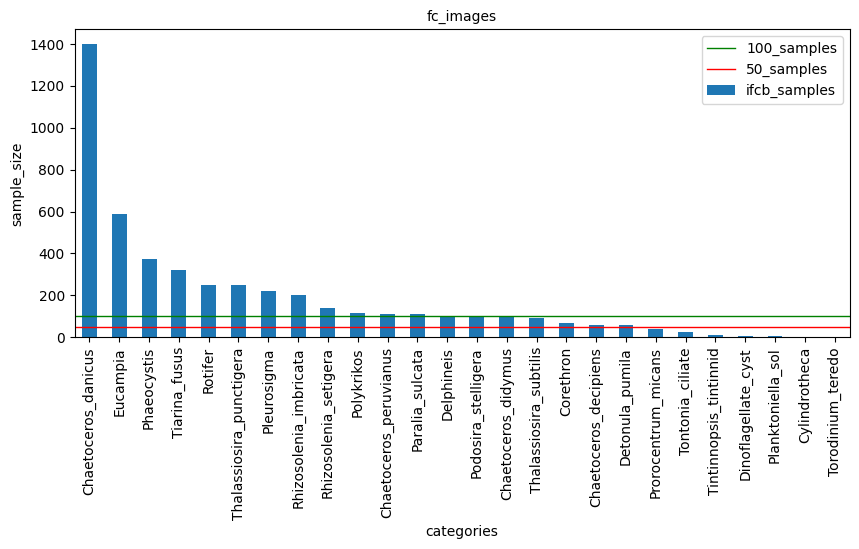

In [679]:
# fig,ax=plt.subplots(figsize=(10,4))
# b=fc_data[fc_data.cat.isin(list(common))].sort_values(by='samples',ascending=False)
# b.plot(kind='bar',x='cat',y='samples',label='ifcb_samples',ax=ax)
# _=ax.axhline(100,color='g',label='100_samples', lw=1)
# _=ax.axhline(50,color='r',label='50_samples',lw=1)
# _=ax.set_ylabel('sample_size',fontsize=10)
# _=ax.set_xlabel('categories',fontsize=10)
# _=ax.legend(fontsize=10)
# _=ax.set_title('fc_images',fontsize=10)
# # _=plt.xticks(fontsize=15)
# # _=plt.yticks(fontsize=20)

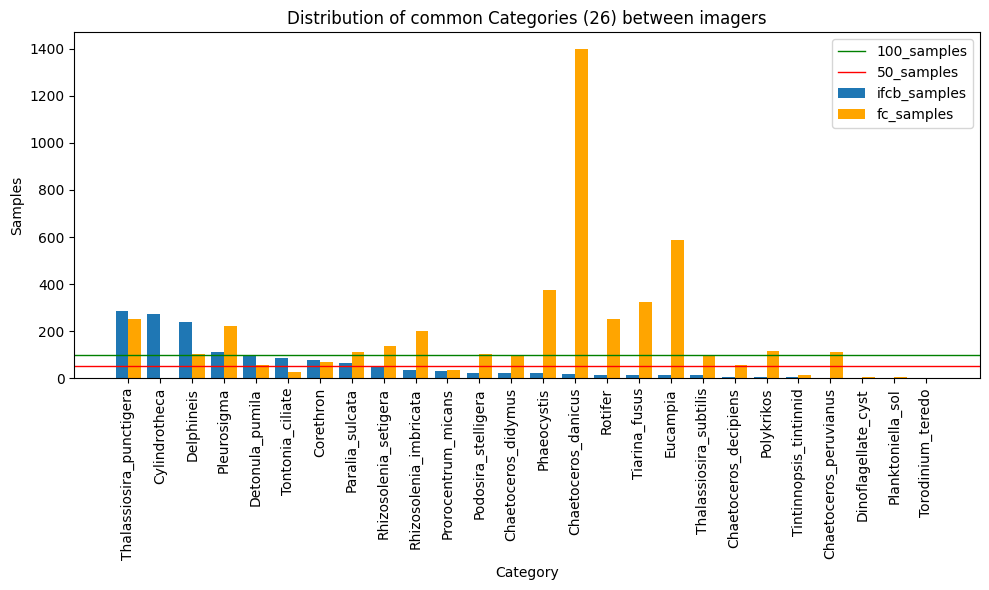

In [702]:
# fig,ax=plt.subplots(figsize=(10,6))
# # Width of each bar
# bar_width = 0.4
# # Positions of the bars on the x-axis
# positions_a = range(len(a))
# positions_b = [p + bar_width for p in positions_a]
# # Plotting the bars
# ax.bar(positions_a, a['samples'], width=bar_width, label='ifcb_samples')
# ax.bar(positions_b, b.set_index('cat').loc[a['cat'], 'samples'], width=bar_width, label='fc_samples', color='orange')
# # Set the position of the x ticks
# ax.set_xticks([p + bar_width / 2 for p in positions_a])
# # Set the labels for the x ticks
# ax.set_xticklabels(a['cat'],rotation=90)
# _=ax.axhline(100,color='g',label='100_samples', lw=1)
# _=ax.axhline(50,color='r',label='50_samples',lw=1)
# # Adding labels and legend
# ax.set_xlabel('Category')
# ax.set_ylabel('Samples')
# ax.set_title('Distribution of common Categories (26) between imagers')
# ax.legend()
# plt.tight_layout()
# # plt.savefig("./common_categories_distribution.jpg")

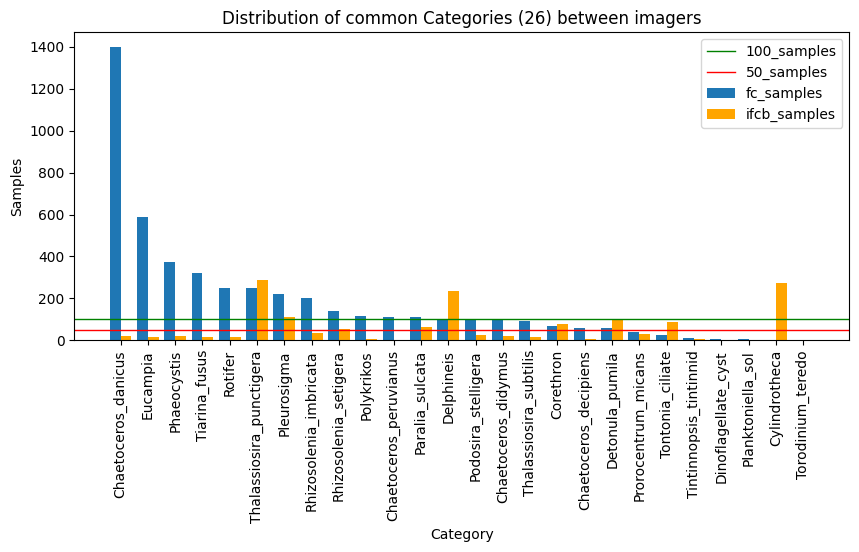

In [699]:
# fig,ax=plt.subplots(figsize=(10,4))
# # Width of each bar
# bar_width = 0.4
# # Positions of the bars on the x-axis
# positions_a = range(len(a))
# positions_b = [p + bar_width for p in positions_a]
# # Plotting the bars
# ax.bar(positions_a, b['samples'], width=bar_width, label='fc_samples')
# ax.bar(positions_b, a.set_index('cat').loc[b['cat'], 'samples'], width=bar_width, label='ifcb_samples', color='orange')
# # Set the position of the x ticks
# ax.set_xticks([p + bar_width / 2 for p in positions_a])
# # Set the labels for the x ticks
# ax.set_xticklabels(b['cat'],rotation=90)
# _=ax.axhline(100,color='g',label='100_samples', lw=1)
# _=ax.axhline(50,color='r',label='50_samples',lw=1)
# # Adding labels and legend
# ax.set_xlabel('Category')
# ax.set_ylabel('Samples')
# ax.set_title('Distribution of common Categories (26) between imagers')
# ax.legend()
